In [68]:
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
data = np.load("PCA.npy")
u,s,v = np.linalg.svd(data)

def Echar(data: np.array, m:int)->float:
    lowpart = 0
    for i in range(m,data.shape[1],):
          lowpart = lowpart + s[i]
    
    answer = (lowpart)/np.sum(s) 
    return answer
E = []
for m in range(0,data.shape[1]):
     E.append(Echar(data,m))

px.scatter(x = np.array(range(0,data.shape[1])), y = E)


{1: 0.2966666666666667,
 3: 0.48833333333333334,
 5: 0.6716666666666666,
 10: 0.7833333333333333,
 15: 0.85,
 20: 0.86,
 30: 0.8633333333333333,
 40: 0.8583333333333333,
 50: 0.8333333333333334,
 60: 0.845}

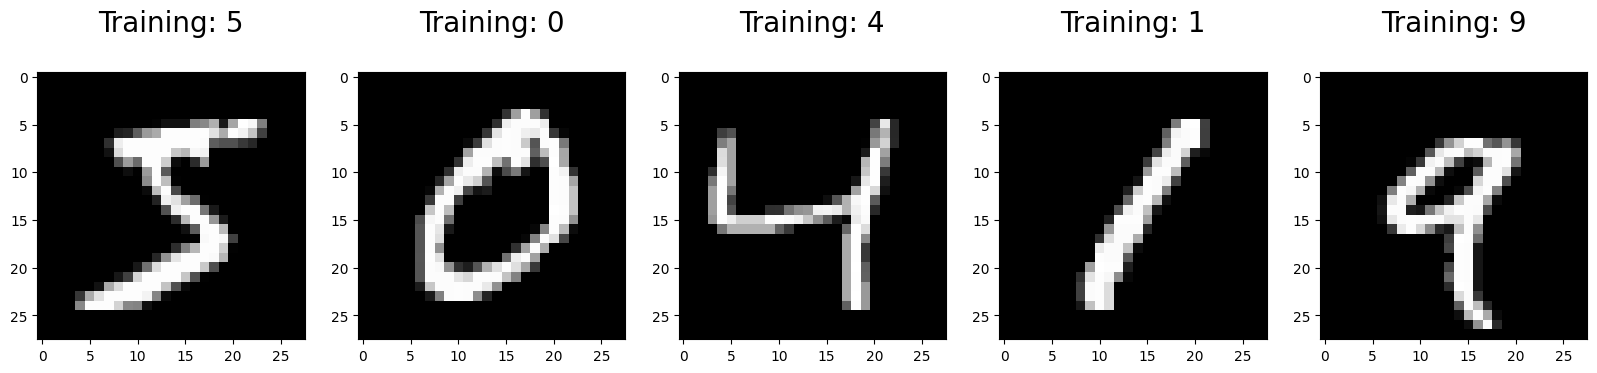

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.datasets import fetch_openml
import numpy as np 
import matplotlib.pyplot as plt
np.random.seed(42)

mnist = fetch_openml('mnist_784')

X = mnist.data.to_numpy()
y = mnist.target.to_numpy()

X = X[:2000]
y = y[:2000]

plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(X[0:5], y[0:5])):
 plt.subplot(1, 5, index + 1)
 plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
 plt.title('Training: %s\n' % label, fontsize = 20)


x_train, x_test, y_train, y_test = train_test_split(X,y,random_state= 42, test_size =0.3)
scaler = StandardScaler()
x_train,x_test = scaler.fit_transform(x_train),scaler.transform(x_test)

accuracy = {}
for k in [1,3,5,10,15,20,30,40,50,60]:
    decomp = PCA(n_components= k)
    x_train_k,x_test_k = decomp.fit_transform(x_train),decomp.transform(x_test)

    model = LogisticRegression(max_iter= 500)
    model.fit(x_train_k,y_train)
    accuracy[k] = accuracy_score(y_test,model.predict(x_test_k))
accuracy